In [9]:
# !pip install pandas

In [55]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import datetime as dt
from datetime import timedelta
import json
import os
import csv
import matplotlib.pyplot as plt


In [8]:
localdir=os.getcwd()
localdir

'C:\\Users\\Vijay Bhaskar\\Downloads\\KL-GRA\\Research- agents'

In [11]:
folder_list=[folder for folder in os.listdir(localdir) if 'Agents_' in folder]
print(len(folder_list), os.listdir(folder_list[0]))

24 ['2024-09-05-9.log', '2024-09-05-9.log.gz', 'Agents_A10.json']


In [21]:
# for every game, find no. of whisper & broadcast & total chats happening
BROADCAST = 'broadcast'
WHISPER = 'whisper'
players_list = ['Alan', 'Kalyani', 'Lamar', 'Sarah', 'Sokka']

game_chat_dict= {}
player_chat_count_dict = {}
print(player_chat_count_dict)

for folder in folder_list:
    total_broadcast = 0
    total_whisper = 0
    print(folder)
    game_chat_dict[folder]= {WHISPER:[], BROADCAST:[]}
    player_chat_count_dict[folder] = {player: {BROADCAST: 0, WHISPER: 0} for player in players_list}
    chat_file=[item for item in os.listdir(folder) if '.log' in item and '.gz' not in item][0]
    print(chat_file)
    chatfile=open(os.path.join(localdir,folder,chat_file), encoding='utf8')
    lines=chatfile.readlines()
    chatfile.close()

    #whisper_list=[]
    #notsecure_list=[]

    for line in lines:
        if "[private" in line:
            game_chat_dict[folder][WHISPER].append(line)
            if ': §f[private' in line:
                player_name = line.split(': §f[private')[0].split('] ')[-1]
            else:
                player_name = line.split(': [private')[0].split('] ')[-1]
            # print(player_name, line)
            player_chat_count_dict[folder][player_name][WHISPER] += 1
            total_whisper += 1
        
        if "<Kalyani>" in line or "<Sarah>" in line or "<Sokka>" in line or "<Alan>" in line or "<Lamar>" in line:
            game_chat_dict[folder][BROADCAST].append(line)
            player_name = line.split('[BarterPlus] <')[1].split('>')[0]
            # print(player_name)
            player_chat_count_dict[folder][player_name][BROADCAST] += 1
            total_broadcast += 1
    for player_name in players_list:
        player_chat_count_dict[folder][player_name][BROADCAST] -= 15
    total_broadcast -= 75
    print('total_broadcast = ', total_broadcast)
    print('total_whisper = ', total_whisper)
    dms= len(game_chat_dict[folder][WHISPER])
    print('no.of whisper chats = ', dms)
    globe= len(game_chat_dict[folder][BROADCAST])-75
    print('no. of broadcasts = ', globe)
    print('total no. of chats = ', dms+globe)
    print('whisper chats (% of total) = ', round(dms/(dms+globe) *100, 2))
    print(player_chat_count_dict[folder])    
    print('##################')
# whisper_list, notsecure_list
player_chat_count_dict

{}
Agents_A10
2024-09-05-9.log
total_broadcast =  58
total_whisper =  98
no.of whisper chats =  98
no. of broadcasts =  58
total no. of chats =  156
whisper chats (% of total) =  62.82
{'Alan': {'broadcast': 1, 'whisper': 15}, 'Kalyani': {'broadcast': 17, 'whisper': 19}, 'Lamar': {'broadcast': 23, 'whisper': 20}, 'Sarah': {'broadcast': -2, 'whisper': 17}, 'Sokka': {'broadcast': 19, 'whisper': 27}}
##################
Agents_A3
2024-09-04-9.log
total_broadcast =  126
total_whisper =  84
no.of whisper chats =  84
no. of broadcasts =  126
total no. of chats =  210
whisper chats (% of total) =  40.0
{'Alan': {'broadcast': 31, 'whisper': 14}, 'Kalyani': {'broadcast': 4, 'whisper': 22}, 'Lamar': {'broadcast': 43, 'whisper': 0}, 'Sarah': {'broadcast': 23, 'whisper': 21}, 'Sokka': {'broadcast': 25, 'whisper': 27}}
##################
Agents_A4
2024-09-04-11.log
total_broadcast =  159
total_whisper =  34
no.of whisper chats =  34
no. of broadcasts =  159
total no. of chats =  193
whisper chats (%

{'Agents_A10': {'Alan': {'broadcast': 1, 'whisper': 15},
  'Kalyani': {'broadcast': 17, 'whisper': 19},
  'Lamar': {'broadcast': 23, 'whisper': 20},
  'Sarah': {'broadcast': -2, 'whisper': 17},
  'Sokka': {'broadcast': 19, 'whisper': 27}},
 'Agents_A3': {'Alan': {'broadcast': 31, 'whisper': 14},
  'Kalyani': {'broadcast': 4, 'whisper': 22},
  'Lamar': {'broadcast': 43, 'whisper': 0},
  'Sarah': {'broadcast': 23, 'whisper': 21},
  'Sokka': {'broadcast': 25, 'whisper': 27}},
 'Agents_A4': {'Alan': {'broadcast': 35, 'whisper': 10},
  'Kalyani': {'broadcast': 2, 'whisper': 8},
  'Lamar': {'broadcast': 42, 'whisper': 3},
  'Sarah': {'broadcast': 41, 'whisper': 5},
  'Sokka': {'broadcast': 39, 'whisper': 8}},
 'Agents_A5': {'Alan': {'broadcast': 28, 'whisper': 21},
  'Kalyani': {'broadcast': 9, 'whisper': 35},
  'Lamar': {'broadcast': 16, 'whisper': 30},
  'Sarah': {'broadcast': 23, 'whisper': 30},
  'Sokka': {'broadcast': 19, 'whisper': 28}},
 'Agents_A6': {'Alan': {'broadcast': 1, 'whisper

In [22]:
# need to check into these -ve/0/1 values
# A10: Sarah broadcast
# A7: Kalyani broadcast
# B6: Kalyani broadcast
# B7: All whisper
# B8: Sarah broadcast, Lamar whisper
# C1: Alan, Sokka broadcast
# C3: Lamar, Sokka broadcast
# C5: Sokka broadcast
# C8: Sarah broadcast

In [69]:
ACCEPTED = 'ACCEPTED'

game_trades_df_dict = {}
game_final_df_dict = {}
game_list = []
gametype_list = []
winner_list = []
score_list = []
for folder in folder_list:
    # print(folder)
    score_file=[item for item in os.listdir(folder) if '.json' in item][0]
    print(score_file)
    data=open(os.path.join(localdir,folder,score_file), encoding='utf8')
    data_load=json.load(data)
    trades_df=df.from_records(data_load["trades"])
    for ind in trades_df.index:
        trades_df.loc[ind,"beginTimestamp"]=pd.Timestamp(trades_df.loc[ind,"beginTimestamp"])
        trades_df.loc[ind,"endTimestamp"]=pd.Timestamp(trades_df.loc[ind,"endTimestamp"])
    print(trades_df.shape, folder)
    trades_df = trades_df[(trades_df['status']==ACCEPTED)]
    game_trades_df_dict[folder] = trades_df
    final_df=df.from_records(data_load['participants'])
    game_final_df_dict[folder] = final_df
    winner_list.append(data_load['winner'])
    game_list.append(folder.split('_')[1])
    if 'A' in folder.split('_')[1]:
        gametype_list.append('Competitive')
    elif 'B' in folder.split('_')[1]:
        gametype_list.append('Baseline')
    else:
        gametype_list.append('Cooperative')
    score_list.append(data_load['score'])

winner_df = df({'game':game_list, 'gametype':gametype_list, 'winner':winner_list,'score':score_list})


Agents_A10.json
(54, 14) Agents_A10
Agents_A3.json
(36, 14) Agents_A3
Agents_A4.json
(64, 14) Agents_A4
Agents_A5.json
(48, 14) Agents_A5
Agents_A6.json
(34, 14) Agents_A6
Agents_A7.json
(35, 14) Agents_A7
Agents_A8.json
(65, 14) Agents_A8
Agents_A9.json
(32, 14) Agents_A9
Agents_B10.json
(60, 14) Agents_B10
Agents_B3.json
(68, 14) Agents_B3
Agents_B4.json
(92, 14) Agents_B4
Agents_B5.json
(61, 14) Agents_B5
Agent_B6.json
(50, 14) Agents_B6
Agents_B7.json
(54, 14) Agents_B7
Agents_B8.json
(47, 14) Agents_B8
Agents_B9.json
(68, 14) Agents_B9
Agents_C1.json
(60, 14) Agents_C1
Agents_C2.json
(53, 14) Agents_C2
Agents_C3.json
(60, 14) Agents_C3
Agents_C4.json
(52, 14) Agents_C4
Agents_C5.json
(56, 14) Agents_C5
Agents_C6.json
(60, 14) Agents_C6
Agents_C7.json
(61, 14) Agents_C7
Agents_C8.json
(44, 14) Agents_C8


In [70]:
trades_df

,requester,requestedInventory,reason,request,beginTimestamp,endScores,beginScores,offer,requested,requesterInventory,requestID,endTimestamp,hasMenu,status
2,Lamar,"[{'amount': 8, 'resource': 'Chicken'}, {'amoun...",,"[{'amount': 1, 'resource': 'Leather'}]",2024-09-08 14:09:30.056000,"{'requester': 47, 'requested': 10}","{'requester': 47, 'requested': 47}","[{'amount': 1, 'resource': 'Cow Spawn Egg'}]",Sokka,"[{'amount': 11, 'resource': 'Chicken'}, {'amou...",LamarSokka2024-09-08 14:09:30.056,2024-09-08 14:09:36.973000,False,ACCEPTED
7,Kalyani,"[{'amount': 8, 'resource': 'Chicken'}, {'amoun...",,"[{'amount': 1, 'resource': 'Oak Log'}]",2024-09-08 14:12:08.674000,"{'requester': 31, 'requested': 10}","{'requester': 31, 'requested': 31}","[{'amount': 1, 'resource': 'Red Glazed Terraco...",Sokka,"[{'amount': 1, 'resource': 'Beef'}, {'amount':...",KalyaniSokka2024-09-08 14:12:08.674,2024-09-08 14:12:53.460000,False,ACCEPTED
9,Alan,"[{'amount': 8, 'resource': 'Chicken'}, {'amoun...",,"[{'amount': 1, 'resource': 'Turtle Egg'}]",2024-09-08 14:14:18.650000,"{'requester': 17, 'requested': 13}","{'requester': 17, 'requested': 17}","[{'amount': 4, 'resource': 'Blue Glazed Terrac...",Sokka,"[{'amount': 18, 'resource': 'Beef'}, {'amount'...",AlanSokka2024-09-08 14:14:18.65,2024-09-08 14:14:47.127000,False,ACCEPTED
10,Sarah,"[{'amount': 11, 'resource': 'Chicken'}, {'amou...",,"[{'amount': 1, 'resource': 'Rabbit Stew'}]",2024-09-08 14:14:44.222000,"{'requester': 36, 'requested': 45}","{'requester': 36, 'requested': 36}","[{'amount': 1, 'resource': 'Leather'}]",Lamar,"[{'amount': 1, 'resource': 'Beef'}, {'amount':...",SarahLamar2024-09-08 14:14:44.222,2024-09-08 14:15:07.911000,False,ACCEPTED
11,Sarah,"[{'amount': 1, 'resource': 'Beef'}, {'amount':...",,"[{'amount': 3, 'resource': 'Cooked Beef'}]",2024-09-08 14:15:15.538000,"{'requester': 46, 'requested': 32}","{'requester': 46, 'requested': 46}","[{'amount': 3, 'resource': 'Lead'}]",Kalyani,"[{'amount': 1, 'resource': 'Beef'}, {'amount':...",SarahKalyani2024-09-08 14:15:15.538,2024-09-08 14:16:00.052000,False,ACCEPTED
12,Sarah,"[{'amount': 8, 'resource': 'Chicken'}, {'amoun...",,"[{'amount': 1, 'resource': 'Rabbit Stew'}]",2024-09-08 14:16:25.905000,"{'requester': 55, 'requested': 25}","{'requester': 55, 'requested': 55}","[{'amount': 1, 'resource': 'Stone Pickaxe'}]",Sokka,"[{'amount': 1, 'resource': 'Beef'}, {'amount':...",SarahSokka2024-09-08 14:16:25.905,2024-09-08 14:17:06.480000,False,ACCEPTED
13,Lamar,"[{'amount': 1, 'resource': 'Beef'}, {'amount':...",,"[{'amount': 1, 'resource': 'Rabbit Hide'}]",2024-09-08 14:16:35.945000,"{'requester': 46, 'requested': 32}","{'requester': 46, 'requested': 46}","[{'amount': 3, 'resource': 'Spruce Planks'}]",Kalyani,"[{'amount': 11, 'resource': 'Chicken'}, {'amou...",LamarKalyani2024-09-08 14:16:35.945,2024-09-08 14:17:02.132000,False,ACCEPTED
14,Lamar,"[{'amount': 18, 'resource': 'Beef'}, {'amount'...",,"[{'amount': 1, 'resource': 'Rabbit Hide'}]",2024-09-08 14:16:35.949000,"{'requester': 49, 'requested': 20}","{'requester': 46, 'requested': 46}","[{'amount': 1, 'resource': 'Cooked Porkchop'}]",Alan,"[{'amount': 11, 'resource': 'Chicken'}, {'amou...",LamarAlan2024-09-08 14:16:35.949,2024-09-08 14:17:23.982000,False,ACCEPTED
15,Alan,"[{'amount': 1, 'resource': 'Beef'}, {'amount':...",,"[{'amount': 1, 'resource': 'Oak Boat'}]",2024-09-08 14:18:09.544000,"{'requester': 20, 'requested': 41}","{'requester': 20, 'requested': 20}","[{'amount': 2, 'resource': 'Birch Log'}]",Kalyani,"[{'amount': 18, 'resource': 'Beef'}, {'amount'...",AlanKalyani2024-09-08 14:18:09.544,2024-09-08 14:18:47.626000,False,ACCEPTED
16,Alan,"[{'amount': 8, 'resource': 'Chicken'}, {'amoun...",,"[{'amount': 1, 'resource': 'Cod'}]",2024-09-08 14:18:40.166000,"{'requester': 30, 'requested': 35}","{'requester': 20, 'requested': 20}","[{'amount': 1, 'resource': 'Glass'}]",Sokka,"[{'amount': 18, 'resource': 'Beef'}, {'amount'...",AlanSokka2024-09-08 14:18:40.166,2024-09-08 14:18:48.700000,F

In [71]:
final_df

,profession,score,name,uuid
0,Butcher,90,Sarah,24624f73-0c74-2e77-8cfe-c423ec26faf3
1,Lumberjack,77,Kalyani,369c5420-2a08-2fdb-b81f-608f035bd740
2,Mason,64,Sokka,6a8613cb-b633-247b-99e4-c1dfabd826f1
3,Leatherworker,60,Lamar,841efec2-fe82-2a82-bfea-906841ee8386
4,Fisher,47,Alan,6069a1c8-7568-21bd-9c83-e75fd6f4f77f


In [75]:
# !pip install openpyxl

In [76]:
winner_df.to_excel('winner_df.xlsx')

Agents_A10
(26, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [29, 30, 33, 34, 44, 46, 46], 'timestamp': [Timestamp('2024-09-05 22:35:07.297000'), Timestamp('2024-09-05 22:35:39.434000'), Timestamp('2024-09-05 22:36:55.911000'), Timestamp('2024-09-05 22:43:15.176000'), Timestamp('2024-09-05 22:46:43.097000'), Timestamp('2024-09-05 22:53:24.146000'), Timestamp('2024-09-05 22:53:53.043000')]}, 'Sarah': {'endscore': [31, 31, 31, 41, 42, 43, 44, 45, 46, 49, 50], 'timestamp': [Timestamp('2024-09-05 22:33:40.599000'), Timestamp('2024-09-05 22:35:07.297000'), Timestamp('2024-09-05 22:35:59.229000'), Timestamp('2024-09-05 22:37:34.315000'), Timestamp('2024-09-05 22:43:43.339000'), Timestamp('2024-09-05 22:48:44.015000'), Timestamp('2024-09-05 22:49:21.805000'), Timestamp('2024-09-05 22:50:30.294000'), Timestamp('2024-09-05 22:53:53.043000'), Timestamp('2024-09-05 22:57:14.7

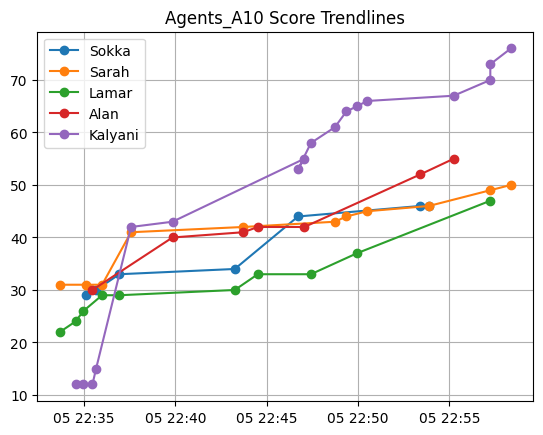

Agents_A3
(19, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [41, 39, 41, 44, 44, 44], 'timestamp': [Timestamp('2024-09-04 19:20:43.297000'), Timestamp('2024-09-04 19:26:47.355000'), Timestamp('2024-09-04 19:27:40.091000'), Timestamp('2024-09-04 19:31:34.966000'), Timestamp('2024-09-04 19:32:23.183000'), Timestamp('2024-09-04 19:33:45.047000')]}, 'Sarah': {'endscore': [34, 37, 40, 43, 46, 36, 37, 40, 43, 46], 'timestamp': [Timestamp('2024-09-04 19:21:09.401000'), Timestamp('2024-09-04 19:22:35.328000'), Timestamp('2024-09-04 19:25:10.055000'), Timestamp('2024-09-04 19:27:40.091000'), Timestamp('2024-09-04 19:31:06.424000'), Timestamp('2024-09-04 19:31:50.221000'), Timestamp('2024-09-04 19:36:29.652000'), Timestamp('2024-09-04 19:38:48.133000'), Timestamp('2024-09-04 19:41:54.171000'), Timestamp('2024-09-04 19:45:40.218000')]}, 'Lamar': {'endscore': [61, 61, 61, 66, 

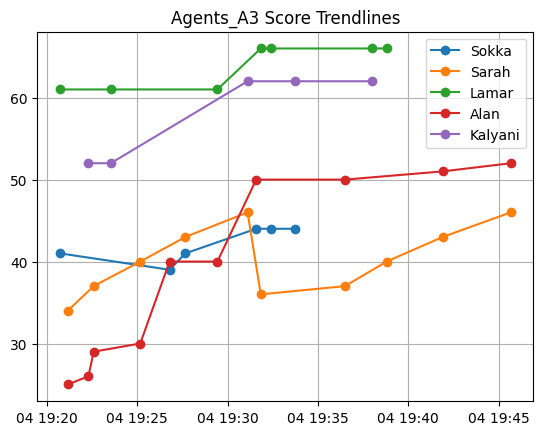

Agents_A4
(34, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [35, 33, 24, 25, 25, 26, 27, 27, 27, 27, 28, 29, 29, 30, 31, 31, 32], 'timestamp': [Timestamp('2024-09-04 21:37:49.589000'), Timestamp('2024-09-04 21:37:49.590000'), Timestamp('2024-09-04 21:41:08.320000'), Timestamp('2024-09-04 21:41:50.318000'), Timestamp('2024-09-04 21:43:44.862000'), Timestamp('2024-09-04 21:47:20.839000'), Timestamp('2024-09-04 21:47:41.233000'), Timestamp('2024-09-04 21:50:10.316000'), Timestamp('2024-09-04 21:54:34.753000'), Timestamp('2024-09-04 21:55:09.140000'), Timestamp('2024-09-04 21:56:11.864000'), Timestamp('2024-09-04 21:57:35.722000'), Timestamp('2024-09-04 21:57:57.122000'), Timestamp('2024-09-04 21:59:56.385000'), Timestamp('2024-09-04 22:00:30.676000'), Timestamp('2024-09-04 22:04:18.399000'), Timestamp('2024-09-04 22:05:29.608000')]}, 'Sarah': {'endscore': [25, 35, 35,

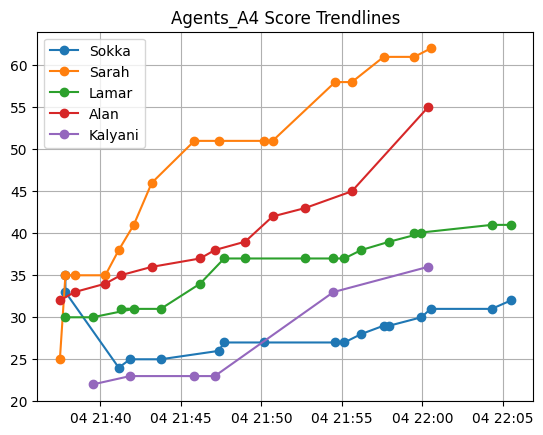

Agents_A5
(30, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [35, 38, 38, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31], 'timestamp': [Timestamp('2024-09-04 22:47:02.092000'), Timestamp('2024-09-04 22:47:02.093000'), Timestamp('2024-09-04 22:47:39.815000'), Timestamp('2024-09-04 22:50:13.282000'), Timestamp('2024-09-04 22:50:39.633000'), Timestamp('2024-09-04 22:51:24.884000'), Timestamp('2024-09-04 22:52:37.476000'), Timestamp('2024-09-04 22:55:48.057000'), Timestamp('2024-09-04 22:59:47.388000'), Timestamp('2024-09-04 23:01:34.074000'), Timestamp('2024-09-04 23:03:58.271000'), Timestamp('2024-09-04 23:06:07.399000'), Timestamp('2024-09-04 23:07:46.104000'), Timestamp('2024-09-04 23:14:49.568000')]}, 'Sarah': {'endscore': [20, 20, 21, 31, 31, 29, 30, 30, 39, 42, 43, 44, 45, 46, 47], 'timestamp': [Timestamp('2024-09-04 22:47:02.092000'), Timestamp('2024-09-04 22:48:44

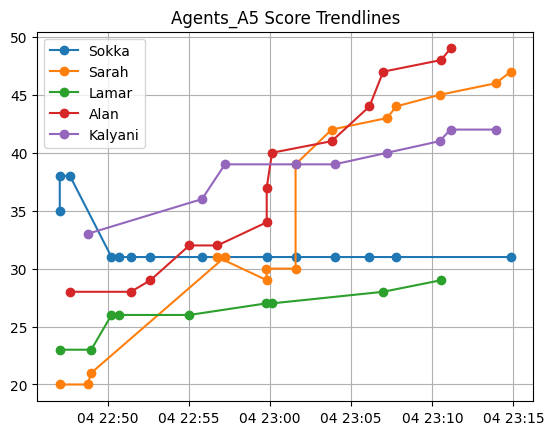

Agents_A6
(16, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [39, 40, 43, 43, 43, 43, 46, 47], 'timestamp': [Timestamp('2024-09-05 00:08:46.217000'), Timestamp('2024-09-05 00:09:33.294000'), Timestamp('2024-09-05 00:10:08.670000'), Timestamp('2024-09-05 00:13:16.448000'), Timestamp('2024-09-05 00:14:21.602000'), Timestamp('2024-09-05 00:16:05.340000'), Timestamp('2024-09-05 00:18:02.129000'), Timestamp('2024-09-05 00:25:07.462000')]}, 'Sarah': {'endscore': [37, 37, 38, 38, 39, 49, 66], 'timestamp': [Timestamp('2024-09-05 00:09:33.294000'), Timestamp('2024-09-05 00:11:33.483000'), Timestamp('2024-09-05 00:14:43.373000'), Timestamp('2024-09-05 00:14:50.039000'), Timestamp('2024-09-05 00:16:05.340000'), Timestamp('2024-09-05 00:20:33.983000'), Timestamp('2024-09-05 00:27:44.984000')]}, 'Lamar': {'endscore': [20, 20, 30, 33, 33, 38, 41], 'timestamp': [Timestamp('2024-09

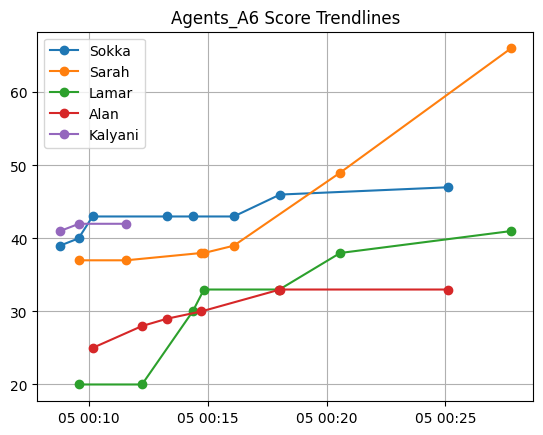

Agents_A7
(24, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [33, 33, 33], 'timestamp': [Timestamp('2024-09-05 01:18:58.363000'), Timestamp('2024-09-05 01:20:13.737000'), Timestamp('2024-09-05 01:23:30.920000')]}, 'Sarah': {'endscore': [23, 24, 27, 29, 28, 32, 32, 32, 32], 'timestamp': [Timestamp('2024-09-05 01:17:13.606000'), Timestamp('2024-09-05 01:19:18.788000'), Timestamp('2024-09-05 01:20:13.737000'), Timestamp('2024-09-05 01:22:31.006000'), Timestamp('2024-09-05 01:22:11.408000'), Timestamp('2024-09-05 01:27:39.388000'), Timestamp('2024-09-05 01:29:50.027000'), Timestamp('2024-09-05 01:33:00.768000'), Timestamp('2024-09-05 01:36:47.147000')]}, 'Lamar': {'endscore': [16, 26, 27, 48, 48, 51, 61, 61, 62, 62, 62, 62], 'timestamp': [Timestamp('2024-09-05 01:16:49.106000'), Timestamp('2024-09-05 01:19:18.788000'), Timestamp('2024-09-05 01:19:34.969000'), Timestamp(

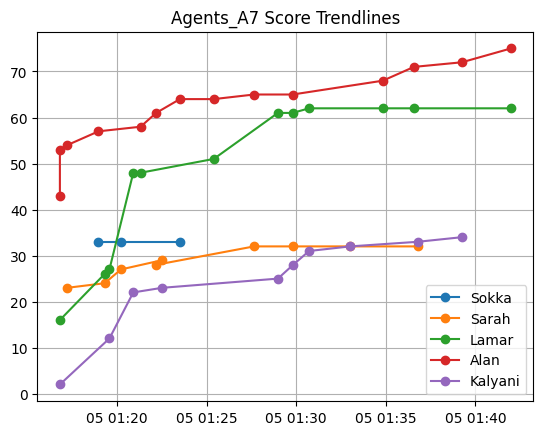

Agents_A8
(39, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [19, 22, 25, 26, 27, 28, 28, 28, 38, 39], 'timestamp': [Timestamp('2024-09-05 02:19:41.896000'), Timestamp('2024-09-05 02:22:46.089000'), Timestamp('2024-09-05 02:24:33.723000'), Timestamp('2024-09-05 02:28:45.268000'), Timestamp('2024-09-05 02:33:52.318000'), Timestamp('2024-09-05 02:34:58.870000'), Timestamp('2024-09-05 02:40:25.897000'), Timestamp('2024-09-05 02:40:43.482000'), Timestamp('2024-09-05 02:46:07.045000'), Timestamp('2024-09-05 02:48:35.022000')]}, 'Sarah': {'endscore': [38, 38, 39, 42, 45, 46, 49, 49, 52, 62, 62, 62], 'timestamp': [Timestamp('2024-09-05 02:20:04.350000'), Timestamp('2024-09-05 02:20:56.268000'), Timestamp('2024-09-05 02:21:15.198000'), Timestamp('2024-09-05 02:22:46.088000'), Timestamp('2024-09-05 02:26:03.670000'), Timestamp('2024-09-05 02:27:23.844000'), Timestamp('2024-0

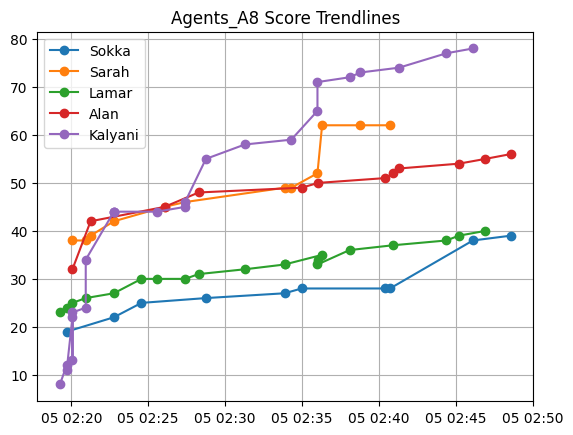

Agents_A9
(21, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [24, 24, 48, 58, 60, 60], 'timestamp': [Timestamp('2024-09-05 17:31:51.484000'), Timestamp('2024-09-05 17:36:05.175000'), Timestamp('2024-09-05 17:38:01.019000'), Timestamp('2024-09-05 17:39:11.464000'), Timestamp('2024-09-05 17:50:40.203000'), Timestamp('2024-09-05 17:54:31.976000')]}, 'Sarah': {'endscore': [18, 19, 19, 29, 30, 31, 34], 'timestamp': [Timestamp('2024-09-05 17:30:47.265000'), Timestamp('2024-09-05 17:32:42.473000'), Timestamp('2024-09-05 17:35:31.665000'), Timestamp('2024-09-05 17:37:28.842000'), Timestamp('2024-09-05 17:39:32.191000'), Timestamp('2024-09-05 17:44:34.316000'), Timestamp('2024-09-05 17:47:12.703000')]}, 'Lamar': {'endscore': [28, 37, 40, 43, 43, 43, 43, 43, 43], 'timestamp': [Timestamp('2024-09-05 17:30:17.685000'), Timestamp('2024-09-05 17:31:51.484000'), Timestamp('2024-09

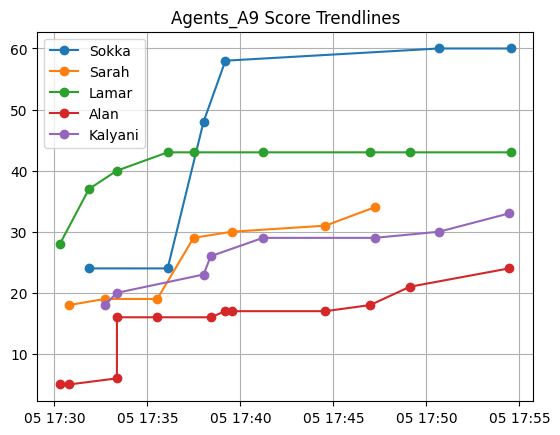

Agents_B10
(41, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [38, 48, 48, 49, 50, 51, 52, 52, 53, 53, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55, 55, 55], 'timestamp': [Timestamp('2024-09-03 23:02:16.386000'), Timestamp('2024-09-03 23:07:17.055000'), Timestamp('2024-09-03 23:07:24.185000'), Timestamp('2024-09-03 23:08:03.305000'), Timestamp('2024-09-03 23:08:52.521000'), Timestamp('2024-09-03 23:09:50.369000'), Timestamp('2024-09-03 23:11:12.379000'), Timestamp('2024-09-03 23:12:25.896000'), Timestamp('2024-09-03 23:13:47.936000'), Timestamp('2024-09-03 23:15:13.734000'), Timestamp('2024-09-03 23:16:26.671000'), Timestamp('2024-09-03 23:17:13.445000'), Timestamp('2024-09-03 23:18:27.574000'), Timestamp('2024-09-03 23:19:16.571000'), Timestamp('2024-09-03 23:21:04.133000'), Timestamp('2024-09-03 23:21:43.752000'), Timestamp('2024-09-03 23:23:07.958000'), Timestamp('

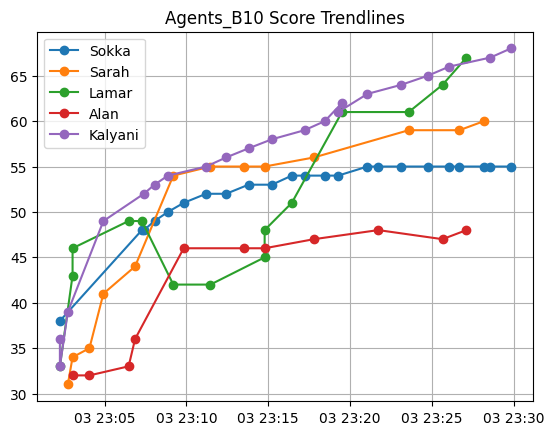

Agents_B3
(21, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [23, 33, 36, 46, 49, 49, 49, 52, 55, 72, 75], 'timestamp': [Timestamp('2024-08-30 01:14:24.899000'), Timestamp('2024-08-30 01:14:24.900000'), Timestamp('2024-08-30 01:15:16.278000'), Timestamp('2024-08-30 01:17:16.548000'), Timestamp('2024-08-30 01:19:00.768000'), Timestamp('2024-08-30 01:19:16.562000'), Timestamp('2024-08-30 01:24:29.906000'), Timestamp('2024-08-30 01:26:42.368000'), Timestamp('2024-08-30 01:29:21.433000'), Timestamp('2024-08-30 01:32:54.387000'), Timestamp('2024-08-30 01:38:33.853000')]}, 'Sarah': {'endscore': [34, 34, 34, 34, 37, 37], 'timestamp': [Timestamp('2024-08-30 01:16:34.831000'), Timestamp('2024-08-30 01:19:50.694000'), Timestamp('2024-08-30 01:20:08.896000'), Timestamp('2024-08-30 01:26:48.042000'), Timestamp('2024-08-30 01:31:41.134000'), Timestamp('2024-08-30 01:35:19.814000

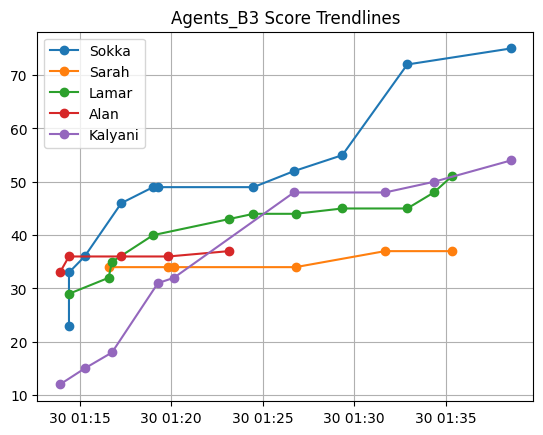

Agents_B4
(20, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [46, 54, 56, 55, 56, 65, 66], 'timestamp': [Timestamp('2024-09-03 15:18:53.883000'), Timestamp('2024-09-03 15:21:18.510000'), Timestamp('2024-09-03 15:21:07.774000'), Timestamp('2024-09-03 15:23:42.702000'), Timestamp('2024-09-03 15:28:33.785000'), Timestamp('2024-09-03 15:28:33.786000'), Timestamp('2024-09-03 15:29:06.891000')]}, 'Sarah': {'endscore': [45, 45, 45, 45], 'timestamp': [Timestamp('2024-09-03 15:19:57.110000'), Timestamp('2024-09-03 15:28:33.785000'), Timestamp('2024-09-03 15:30:39.071000'), Timestamp('2024-09-03 15:32:10.163000')]}, 'Lamar': {'endscore': [56, 59, 59, 59, 59, 60, 61, 75, 72], 'timestamp': [Timestamp('2024-09-03 15:19:57.110000'), Timestamp('2024-09-03 15:21:18.511000'), Timestamp('2024-09-03 15:26:00.712000'), Timestamp('2024-09-03 15:27:28.267000'), Timestamp('2024-09-03 15:2

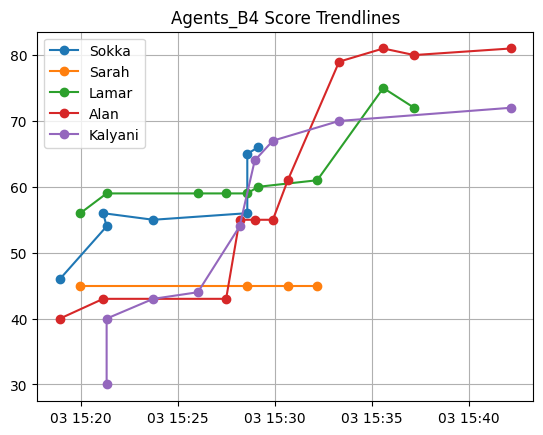

Agents_B5
(33, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [35, 38, 39, 38, 48, 49, 52, 52, 62, 65, 65, 65, 64, 66, 67, 66], 'timestamp': [Timestamp('2024-09-03 16:43:04.900000'), Timestamp('2024-09-03 16:43:51.769000'), Timestamp('2024-09-03 16:44:13.998000'), Timestamp('2024-09-03 16:45:04.986000'), Timestamp('2024-09-03 16:45:06.703000'), Timestamp('2024-09-03 16:46:15.827000'), Timestamp('2024-09-03 16:48:54.125000'), Timestamp('2024-09-03 16:49:04.547000'), Timestamp('2024-09-03 16:49:41.542000'), Timestamp('2024-09-03 16:50:27.495000'), Timestamp('2024-09-03 16:53:19.241000'), Timestamp('2024-09-03 16:54:42.282000'), Timestamp('2024-09-03 16:59:51.561000'), Timestamp('2024-09-03 17:02:42.622000'), Timestamp('2024-09-03 17:03:01.290000'), Timestamp('2024-09-03 17:05:39.654000')]}, 'Sarah': {'endscore': [32, 32, 32, 32, 32, 32, 32, 32, 32, 29, 29, 29], 'timest

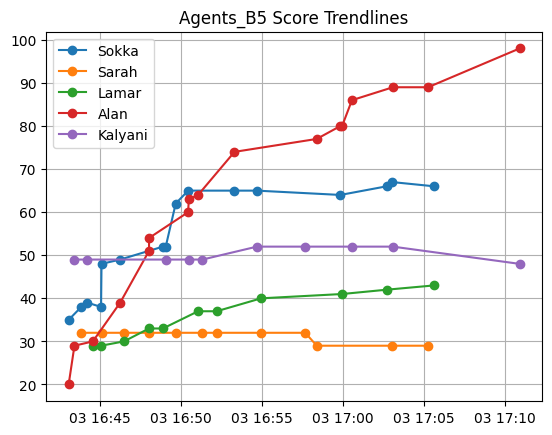

Agents_B6
(25, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [52, 42, 64, 64, 64, 64, 66, 66, 66, 66, 66], 'timestamp': [Timestamp('2024-09-03 17:43:25.091000'), Timestamp('2024-09-03 17:43:08.601000'), Timestamp('2024-09-03 17:45:29.698000'), Timestamp('2024-09-03 17:47:54.896000'), Timestamp('2024-09-03 17:49:18.461000'), Timestamp('2024-09-03 17:52:40.258000'), Timestamp('2024-09-03 17:57:13.759000'), Timestamp('2024-09-03 17:58:35.739000'), Timestamp('2024-09-03 18:03:41.271000'), Timestamp('2024-09-03 18:04:17.724000'), Timestamp('2024-09-03 18:06:25.885000')]}, 'Sarah': {'endscore': [19, 34, 34, 44, 46, 46, 52, 50, 44], 'timestamp': [Timestamp('2024-09-03 17:43:08.601000'), Timestamp('2024-09-03 17:47:54.896000'), Timestamp('2024-09-03 17:48:10.564000'), Timestamp('2024-09-03 17:52:40.258000'), Timestamp('2024-09-03 17:56:21.594000'), Timestamp('2024-09-03 18:

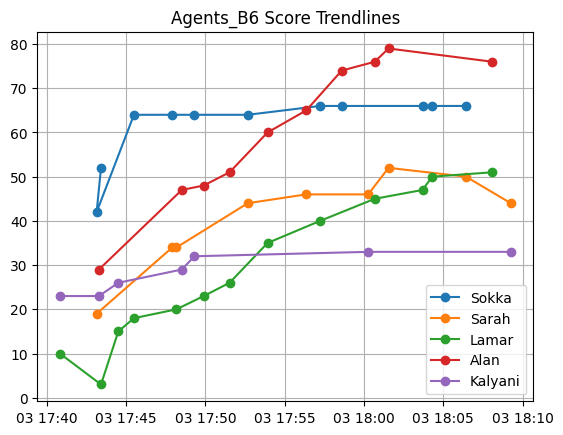

Agents_B7
(34, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [37, 55, 65, 68, 78, 81, 84, 74, 77, 87], 'timestamp': [Timestamp('2024-09-03 18:50:57.898000'), Timestamp('2024-09-03 18:52:59.729000'), Timestamp('2024-09-03 18:53:21.351000'), Timestamp('2024-09-03 18:57:05.674000'), Timestamp('2024-09-03 18:58:33.154000'), Timestamp('2024-09-03 19:01:43.553000'), Timestamp('2024-09-03 19:04:17.054000'), Timestamp('2024-09-03 19:06:50.439000'), Timestamp('2024-09-03 19:10:25.581000'), Timestamp('2024-09-03 19:14:05.385000')]}, 'Sarah': {'endscore': [56, 57, 58, 59, 60, 63, 66, 67, 70, 70, 70], 'timestamp': [Timestamp('2024-09-03 18:51:14.997000'), Timestamp('2024-09-03 18:52:26.358000'), Timestamp('2024-09-03 18:53:16.323000'), Timestamp('2024-09-03 18:57:09.794000'), Timestamp('2024-09-03 18:58:04.523000'), Timestamp('2024-09-03 19:01:10.106000'), Timestamp('2024-09-03

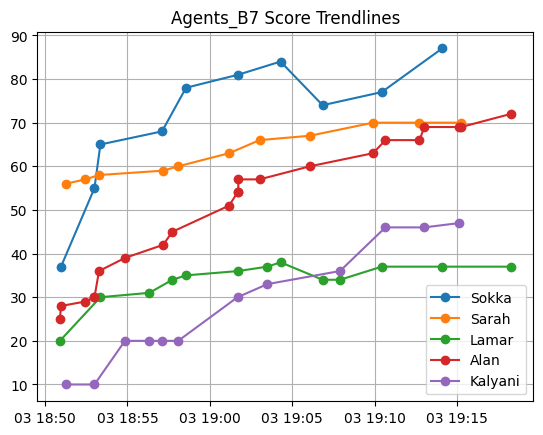

Agents_B8
(25, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [16, 16, 19, 31, 32, 35, 59, 71], 'timestamp': [Timestamp('2024-09-03 19:45:43.050000'), Timestamp('2024-09-03 19:46:48.220000'), Timestamp('2024-09-03 19:50:03.473000'), Timestamp('2024-09-03 19:51:19.140000'), Timestamp('2024-09-03 19:52:48.965000'), Timestamp('2024-09-03 19:53:55.669000'), Timestamp('2024-09-03 19:55:28.004000'), Timestamp('2024-09-03 20:07:43.270000')]}, 'Sarah': {'endscore': [26, 27, 27, 27, 27, 27, 28, 37, 37], 'timestamp': [Timestamp('2024-09-03 19:47:53.430000'), Timestamp('2024-09-03 19:50:03.473000'), Timestamp('2024-09-03 19:52:36.351000'), Timestamp('2024-09-03 19:52:48.965000'), Timestamp('2024-09-03 19:54:20.888000'), Timestamp('2024-09-03 19:55:51.853000'), Timestamp('2024-09-03 20:00:16.655000'), Timestamp('2024-09-03 20:01:45.196000'), Timestamp('2024-09-03 20:10:41.429000

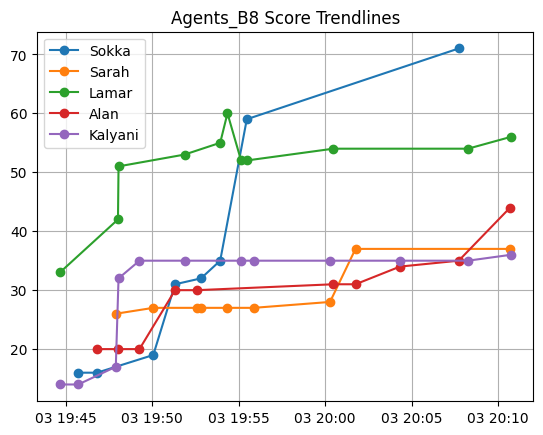

Agents_B9
(25, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [24, 25, 40, 58, 59, 62, 71, 69, 87, 91], 'timestamp': [Timestamp('2024-09-03 21:50:31.901000'), Timestamp('2024-09-03 21:52:25.867000'), Timestamp('2024-09-03 21:52:57.140000'), Timestamp('2024-09-03 21:54:05.594000'), Timestamp('2024-09-03 21:55:31.019000'), Timestamp('2024-09-03 21:55:35.570000'), Timestamp('2024-09-03 21:59:02.902000'), Timestamp('2024-09-03 22:00:57.685000'), Timestamp('2024-09-03 22:07:05.396000'), Timestamp('2024-09-03 22:15:55.884000')]}, 'Sarah': {'endscore': [34, 34, 35, 36, 36, 36, 36], 'timestamp': [Timestamp('2024-09-03 21:50:31.902000'), Timestamp('2024-09-03 21:52:57.140000'), Timestamp('2024-09-03 21:58:20.686000'), Timestamp('2024-09-03 21:59:02.902000'), Timestamp('2024-09-03 22:00:20.003000'), Timestamp('2024-09-03 22:17:08.583000'), Timestamp('2024-09-03 22:18:06.691000

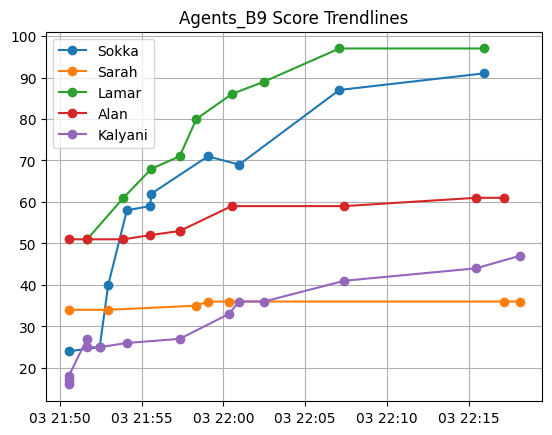

Agents_C1
(29, 14)
{'Alan', 'Lamar', 'Sokka', 'Sarah'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [39, 42, 52, 55, 56, 60, 61, 79, 80, 81], 'timestamp': [Timestamp('2024-09-06 17:20:38.833000'), Timestamp('2024-09-06 17:24:00.812000'), Timestamp('2024-09-06 17:24:46.413000'), Timestamp('2024-09-06 17:25:54.871000'), Timestamp('2024-09-06 17:33:40.544000'), Timestamp('2024-09-06 17:36:31.729000'), Timestamp('2024-09-06 17:38:00.033000'), Timestamp('2024-09-06 17:40:17.468000'), Timestamp('2024-09-06 17:41:36.904000'), Timestamp('2024-09-06 17:43:47.438000')]}, 'Sarah': {'endscore': [13, 11, 21, 21, 27, 25, 25, 26, 31, 31, 32, 32], 'timestamp': [Timestamp('2024-09-06 17:19:56.483000'), Timestamp('2024-09-06 17:20:38.833000'), Timestamp('2024-09-06 17:21:00.451000'), Timestamp('2024-09-06 17:21:56.628000'), Timestamp('2024-09-06 17:22:47.761000'), Timestamp('2024-09-06 17:25:52.589000'), Timestamp('2024-09-06 17:26:

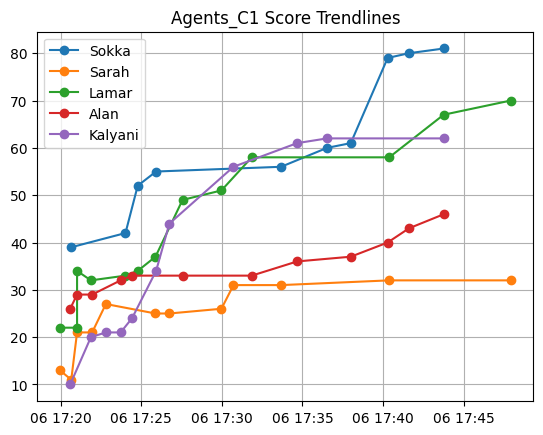

Agents_C2
(31, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [39, 42, 45, 45, 48, 50, 50, 50, 50, 53, 61, 55, 55], 'timestamp': [Timestamp('2024-09-06 20:42:57.479000'), Timestamp('2024-09-06 20:44:02.786000'), Timestamp('2024-09-06 20:45:08.363000'), Timestamp('2024-09-06 20:46:38.180000'), Timestamp('2024-09-06 20:48:46.572000'), Timestamp('2024-09-06 20:52:47.433000'), Timestamp('2024-09-06 20:54:35.404000'), Timestamp('2024-09-06 20:55:55.935000'), Timestamp('2024-09-06 21:02:09.597000'), Timestamp('2024-09-06 21:04:28.818000'), Timestamp('2024-09-06 21:08:25.119000'), Timestamp('2024-09-06 21:09:50.301000'), Timestamp('2024-09-06 21:11:38.231000')]}, 'Sarah': {'endscore': [18, 19, 37, 40, 41, 42, 49, 47, 51, 51, 53], 'timestamp': [Timestamp('2024-09-06 20:46:12.982000'), Timestamp('2024-09-06 20:46:38.180000'), Timestamp('2024-09-06 20:48:46.572000'), Timestamp

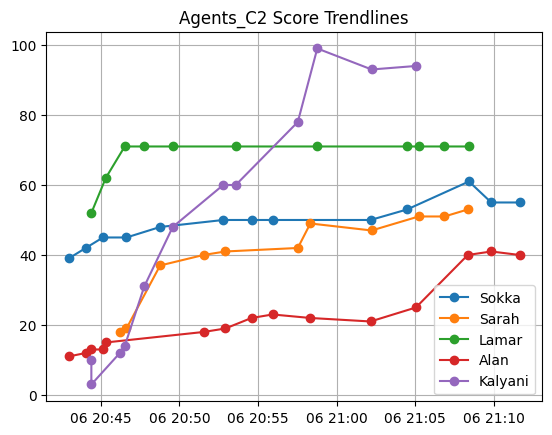

Agents_C3
(31, 14)
{'Lamar', 'Sokka', 'Sarah', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [9, 12, 15, 18, 19, 22, 32, 42, 45, 48, 48, 51, 52], 'timestamp': [Timestamp('2024-09-07 13:44:01.804000'), Timestamp('2024-09-07 13:47:30.899000'), Timestamp('2024-09-07 13:49:59.246000'), Timestamp('2024-09-07 13:51:17.653000'), Timestamp('2024-09-07 13:53:44.352000'), Timestamp('2024-09-07 13:54:04.602000'), Timestamp('2024-09-07 13:57:35.631000'), Timestamp('2024-09-07 13:58:06.674000'), Timestamp('2024-09-07 13:59:00.355000'), Timestamp('2024-09-07 14:03:38.188000'), Timestamp('2024-09-07 14:05:28.713000'), Timestamp('2024-09-07 14:06:13.107000'), Timestamp('2024-09-07 14:10:00.533000')]}, 'Sarah': {'endscore': [49, 50, 50, 51, 51, 59, 68, 69, 70, 71, 80, 81, 91, 105, 106], 'timestamp': [Timestamp('2024-09-07 13:42:47.849000'), Timestamp('2024-09-07 13:43:14.046000'), Timestamp('2024-09-07 13:44:01.804000'), 

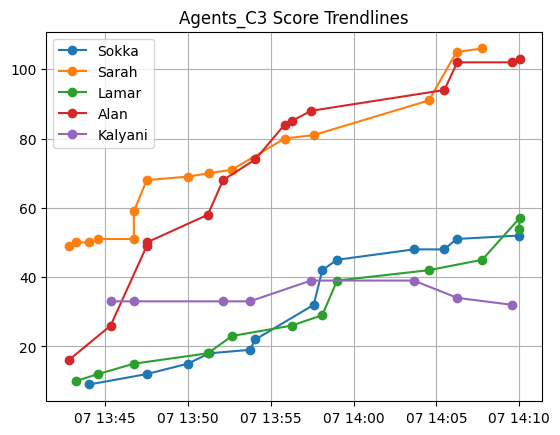

Agents_C4
(29, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [37, 40, 43, 43, 46, 56, 62, 65, 65, 68, 71, 74, 74, 74], 'timestamp': [Timestamp('2024-09-08 00:16:56.514000'), Timestamp('2024-09-08 00:17:43.885000'), Timestamp('2024-09-08 00:18:14.250000'), Timestamp('2024-09-08 00:19:10.989000'), Timestamp('2024-09-08 00:20:44.469000'), Timestamp('2024-09-08 00:21:36.485000'), Timestamp('2024-09-08 00:22:00.658000'), Timestamp('2024-09-08 00:26:51.214000'), Timestamp('2024-09-08 00:28:04.258000'), Timestamp('2024-09-08 00:28:18.877000'), Timestamp('2024-09-08 00:30:51.114000'), Timestamp('2024-09-08 00:33:26.944000'), Timestamp('2024-09-08 00:36:06.212000'), Timestamp('2024-09-08 00:36:50.496000')]}, 'Sarah': {'endscore': [30, 30, 30, 30, 31, 35, 45, 52, 52, 55, 58], 'timestamp': [Timestamp('2024-09-08 00:15:25.430000'), Timestamp('2024-09-08 00:15:27.698000'), Times

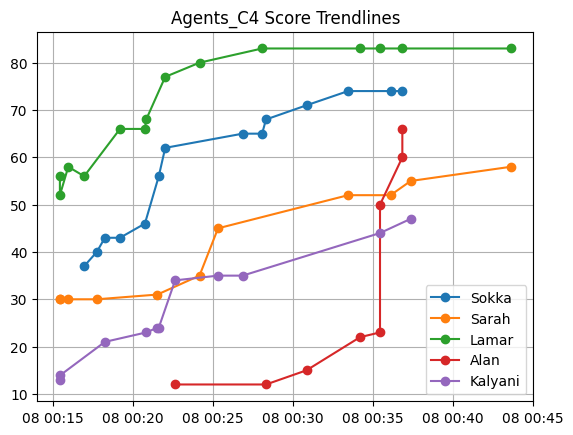

Agents_C5
(32, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Alan', 'Lamar', 'Sarah', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [23, 26, 26, 29, 29, 32, 35, 55, 55, 59, 65], 'timestamp': [Timestamp('2024-09-08 01:14:07.970000'), Timestamp('2024-09-08 01:17:51.170000'), Timestamp('2024-09-08 01:20:10.507000'), Timestamp('2024-09-08 01:21:12.094000'), Timestamp('2024-09-08 01:23:01.023000'), Timestamp('2024-09-08 01:23:36.165000'), Timestamp('2024-09-08 01:27:35.229000'), Timestamp('2024-09-08 01:27:59.337000'), Timestamp('2024-09-08 01:29:29.612000'), Timestamp('2024-09-08 01:31:35.626000'), Timestamp('2024-09-08 01:38:33.768000')]}, 'Sarah': {'endscore': [32, 34, 56, 57, 60, 66, 66, 72, 71, 71, 78, 79, 79, 79, 85, 86, 90], 'timestamp': [Timestamp('2024-09-08 01:12:30.537000'), Timestamp('2024-09-08 01:14:08.720000'), Timestamp('2024-09-08 01:15:53.775000'), Timestamp('2024-09-08 01:17:51.170000'), Timestamp('2024-09-08 01:18:32.755000'), Ti

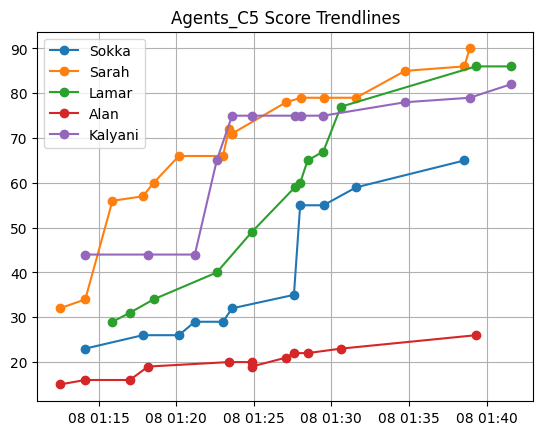

Agents_C6
(26, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Alan', 'Sokka', 'Sarah', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [50, 50, 56, 59, 59, 59, 79, 84, 94, 96], 'timestamp': [Timestamp('2024-09-08 03:58:41.156000'), Timestamp('2024-09-08 04:00:46.408000'), Timestamp('2024-09-08 04:05:31.507000'), Timestamp('2024-09-08 04:09:00.290000'), Timestamp('2024-09-08 04:09:38.954000'), Timestamp('2024-09-08 04:15:39.765000'), Timestamp('2024-09-08 04:21:10.593000'), Timestamp('2024-09-08 04:22:21.861000'), Timestamp('2024-09-08 04:22:53.181000'), Timestamp('2024-09-08 04:25:47.637000')]}, 'Sarah': {'endscore': [35, 36, 37, 42, 46, 51, 55, 45, 45, 50], 'timestamp': [Timestamp('2024-09-08 03:57:50.262000'), Timestamp('2024-09-08 03:58:41.156000'), Timestamp('2024-09-08 04:01:53.084000'), Timestamp('2024-09-08 04:02:05.677000'), Timestamp('2024-09-08 04:06:10.785000'), Timestamp('2024-09-08 04:15:31.857000'), Timestamp('2024-09-08 04:18:20.778

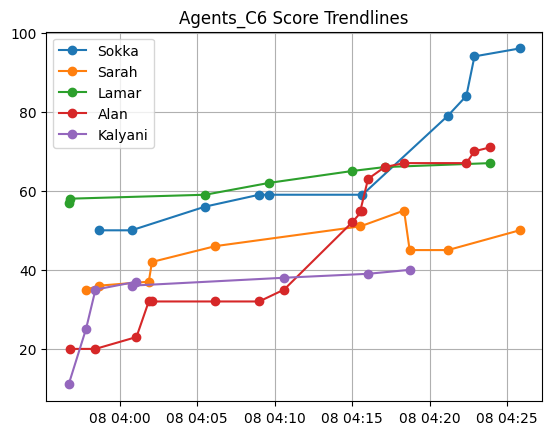

Agents_C7
(26, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [38, 38, 38, 47, 48, 48, 53], 'timestamp': [Timestamp('2024-09-08 12:33:20.923000'), Timestamp('2024-09-08 12:36:50.237000'), Timestamp('2024-09-08 12:44:23.128000'), Timestamp('2024-09-08 12:52:19.381000'), Timestamp('2024-09-08 12:53:43.412000'), Timestamp('2024-09-08 12:56:26.789000'), Timestamp('2024-09-08 12:57:35.350000')]}, 'Sarah': {'endscore': [7, 7, 16, 17, 15, 18, 24, 19, 20, 39, 27, 42, 45, 46, 51], 'timestamp': [Timestamp('2024-09-08 12:30:27.143000'), Timestamp('2024-09-08 12:30:39.292000'), Timestamp('2024-09-08 12:31:58.431000'), Timestamp('2024-09-08 12:33:20.923000'), Timestamp('2024-09-08 12:36:50.237000'), Timestamp('2024-09-08 12:38:56.937000'), Timestamp('2024-09-08 12:41:04.164000'), Timestamp('2024-09-08 12:40:18.787000'), Timestamp('2024-09-08 12:40:57.494000'), Timestamp('2024-09-

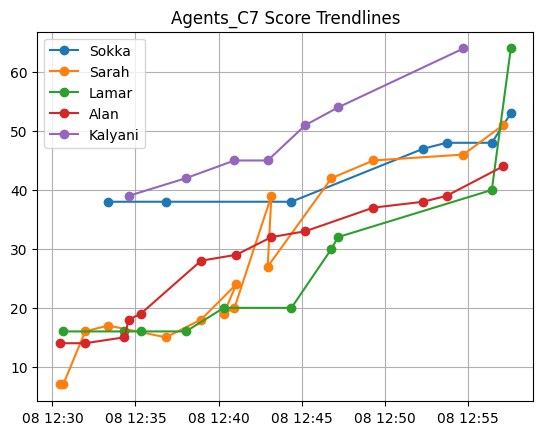

Agents_C8
(20, 14)
{'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'} {'Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani'}
['Sokka', 'Sarah', 'Lamar', 'Alan', 'Kalyani']
{'Sokka': {'endscore': [10, 10, 13, 25, 35, 36, 48, 52, 54], 'timestamp': [Timestamp('2024-09-08 14:09:36.973000'), Timestamp('2024-09-08 14:12:53.460000'), Timestamp('2024-09-08 14:14:47.127000'), Timestamp('2024-09-08 14:17:06.480000'), Timestamp('2024-09-08 14:18:48.700000'), Timestamp('2024-09-08 14:21:19.972000'), Timestamp('2024-09-08 14:25:36.083000'), Timestamp('2024-09-08 14:26:57.362000'), Timestamp('2024-09-08 14:31:27.524000')]}, 'Sarah': {'endscore': [36, 46, 55, 65, 77, 87, 90], 'timestamp': [Timestamp('2024-09-08 14:15:07.911000'), Timestamp('2024-09-08 14:16:00.052000'), Timestamp('2024-09-08 14:17:06.480000'), Timestamp('2024-09-08 14:21:09.886000'), Timestamp('2024-09-08 14:25:36.083000'), Timestamp('2024-09-08 14:33:54.802000'), Timestamp('2024-09-08 14:37:04.883000')]}, 'Lamar': {'endscore': [47, 45, 46, 49, 

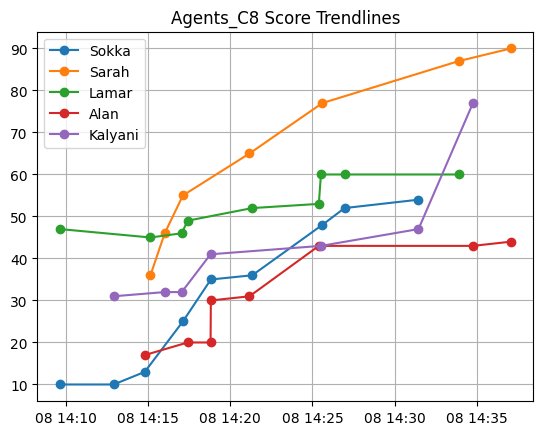

In [60]:

# for game_name in data_df_dict:
# #     print(game_name)
#     game_df = data_df_dict[game_name]
# #     print(game_df.shape)
#     offer_items=[]
#     request_items=[]
#     for item in game_df["offer"].items():
#         if item[1]==[]: #declined, cancelled
#             offer_items.append([])
#         else:
#             unique_offer_items=np.unique([offer_item["resource"] for offer_item in item[1]])
#             offer_items.append(unique_offer_items)
#     for item in game_df["request"].items():
#         if item[1]==[]: #declined, cancelled
#             request_items.append([])
#         else:
#             unique_request_items=np.unique([request_item["resource"] for request_item in item[1]])
#             request_items.append(unique_request_items)
#     game_df["unique_offer_items"]=offer_items
#     game_df["unique_request_items"]=request_items
#     data_df_dict[game_name] = game_df    

for folder in folder_list:
    print(folder)
    requester_endscores_list = []
    requested_endscores_list = []
    requester_beginscores_list = []
    requested_beginscores_list = []
    game_df = game_trades_df_dict[folder]
    print(game_df.shape)
    if ('endScores' in game_df.columns and 'beginScores' in game_df.columns):
        for index, row in game_df.iterrows():
            endscores = row['endScores']
            requester_endscore = endscores['requester']
            requested_endscore = endscores['requested']
            requester_endscores_list.append(requester_endscore)
            requested_endscores_list.append(requested_endscore)

            beginscores = row['beginScores']
            requester_beginscore = beginscores['requester']
            requested_beginscore = beginscores['requested']
            requester_beginscores_list.append(requester_beginscore)
            requested_beginscores_list.append(requested_beginscore)
        game_df['requester_endScores'] = requester_endscores_list
        game_df['requested_endScores'] = requested_endscores_list
        game_df['requester_beginScores'] = requester_beginscores_list
        game_df['requested_beginScores'] = requested_beginscores_list
        game_trades_df_dict[folder] = game_df
        print(set(game_df['requester']), set(game_df['requested']))
        players_set = set(game_df['requester']) | set(game_df['requested'])
        print(list(players_set))

        players_score_time = {}
        for player in list(players_set):
            players_score_time[player] = {'endscore': [None], 'timestamp': [None]}
            player_trades_df = game_df[(
                game_df['requester'] == player) | (
                game_df['requested'] == player)]
            endscores_list = []
            timestamps_list = []
            for index, row in player_trades_df.iterrows():
                timestamps_list.append(row['endTimestamp'])
                if row['requester'] == player:
                    endscores_list.append(row['requester_endScores'])
                if row['requested'] == player:
                    endscores_list.append(row['requested_endScores'])
            players_score_time[player]['endscore'] = endscores_list
            players_score_time[player]['timestamp'] = timestamps_list
        print(players_score_time)

        fig = plt.figure()
        for player in players_score_time:
            plt.plot(players_score_time[player]['timestamp'], players_score_time[player]['endscore'], 'o-') 
        plt.legend(list(players_set))
        plt.grid()
        plt.title(folder + ' Score Trendlines')
        plt.savefig(folder + '_score_trendline_' + ACCEPTED + '.png', format="PNG")
        plt.show()


In [89]:
trade_partner_df = df()
game_list = []
gametype_list = []
player_list = []
partner_num_list = []

for folder in folder_list:
    game_df = game_trades_df_dict[folder]
    for player_name in ['Alan', 'Kalyani', 'Lamar', 'Sarah', 'Sokka']:
        player_df = game_df[(game_df['requester']==player_name) | (game_df['requested']==player_name)]
        requester_set = set(player_df['requester'].to_list())
        requested_set = set(player_df['requested'].to_list())
        game_list.append(folder.split('_')[1])
        if 'A' in folder.split('_')[1]:
            gametype_list.append('Competitive')
        elif 'B' in folder.split('_')[1]:
            gametype_list.append('Baseline')
        else:
            gametype_list.append('Cooperative')
        player_list.append(player_name)
        partner_num_list.append(len(set(requester_set | requested_set))-1)

trade_partner_df = df({'game':game_list, 'gametype':gametype_list, 'player':player_list,'partners':partner_num_list})
trade_partner_df.to_excel('trade_partner_df.xlsx')
trade_partner_df

,game,gametype,player,partners
0,A10,Competitive,Alan,4
1,A10,Competitive,Kalyani,4
2,A10,Competitive,Lamar,4
3,A10,Competitive,Sarah,4
4,A10,Competitive,Sokka,4
...,...,...,...,...
115,C8,Cooperative,Alan,4
116,C8,Cooperative,Kalyani,4
117,C8,Cooperative,Lamar,4
118,C8,Cooperative,Sarah,4


In [86]:
player_df = game_df[(game_df['requester']=='Alan') | (game_df['requested']=='Alan')]
requester_set = set(player_df['requester'].to_list())
requested_set = set(player_df['requested'].to_list())
len(set(requester_set | requested_set))

5